# **[ Gray Theme ]   EDA for Prediction Titanic** 
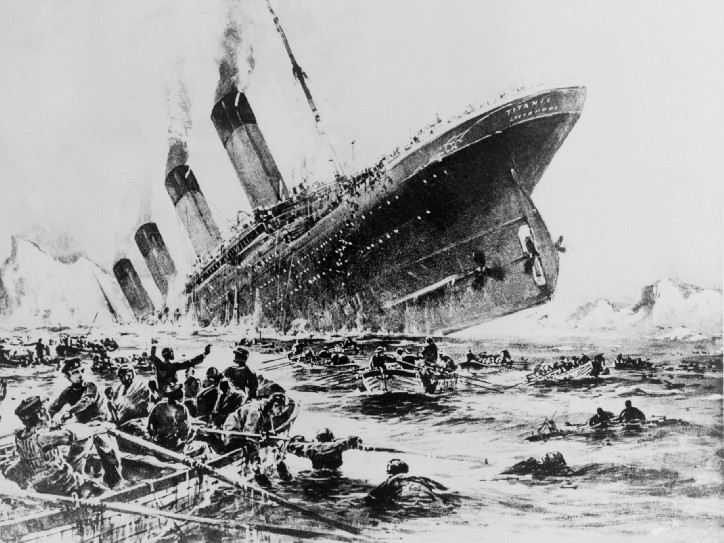


# Contents of the Notebook:
 
# Part1: Exploratory Data Analysis(EDA):
### 1) Analysis of the features 

### 2) Finding relationship between features.

### 3) Making a new feature for modeling.

# Part2: Feature Engineering and Data Cleaning:

### Converting features into suitable form for modeling.

### 1) Continous Features  

### 2) Categorical Features 

### 3) Else 

# Part3: Predictive Modeling

### 1) Modling

### 2) Cross Validation

### 3) Ensembling


### Data Check 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


We can check out the 'Survived' columns are not in test data. 

Which it means that the 'Survived' column is our target value. 

In [5]:
# Save our target values as name 'label'
label = train['Survived']

In [6]:
# Data describe 
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Missing Values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is missing values in age, cabin, embarked. 

We will going to fill this out later. Let's check out our data dtypes and unique valeus before EDA. I am going to do my EDA based on the dtypes. 

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Also check out the unique valeus in each columns

dict = {}
for i in list(train.columns):
    dict[i] = train[i].value_counts().shape[0]

pd.DataFrame(dict, index=['unique count']).transpose()

,unique count
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


First drop the unnecessary columns

In [10]:
# drop columns that is not useful 
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Sex,Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

Now we can seperate our columns into categorical features and continouse features.

**Categorical Features**: Sex, Parch, Embarked

**Ordinal Features**: Pclass

**Continous Features**: age, fare

**Discrete Feature**: SibSip

**Target Feature**: Survived

# **Part1: Exploratory Data Analysis(EDA):**
Remember that we have to only fill out the missing values of age, and embarked columns. 

We will figure out by exploratory data analysis. 

In [11]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


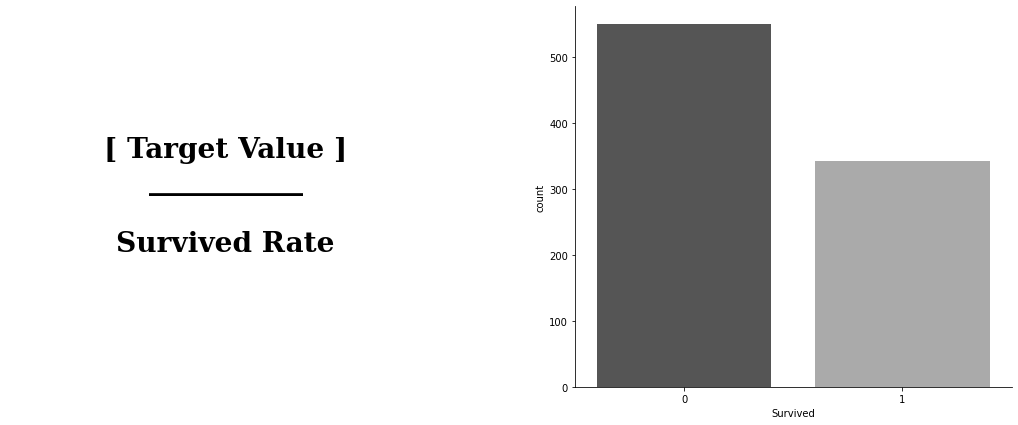

In [12]:
# age, fare 

fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# title 
ax0.text(0.5,0.5,"[ Target Value ]\n___________\n\nSurvived Rate",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 28,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)


# Survived count
ax_survived = ax1
sns.countplot(x='Survived',color='gray', data=train,ax=ax_survived, palette='gist_gray')
sns.despine()

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)


plt.show();

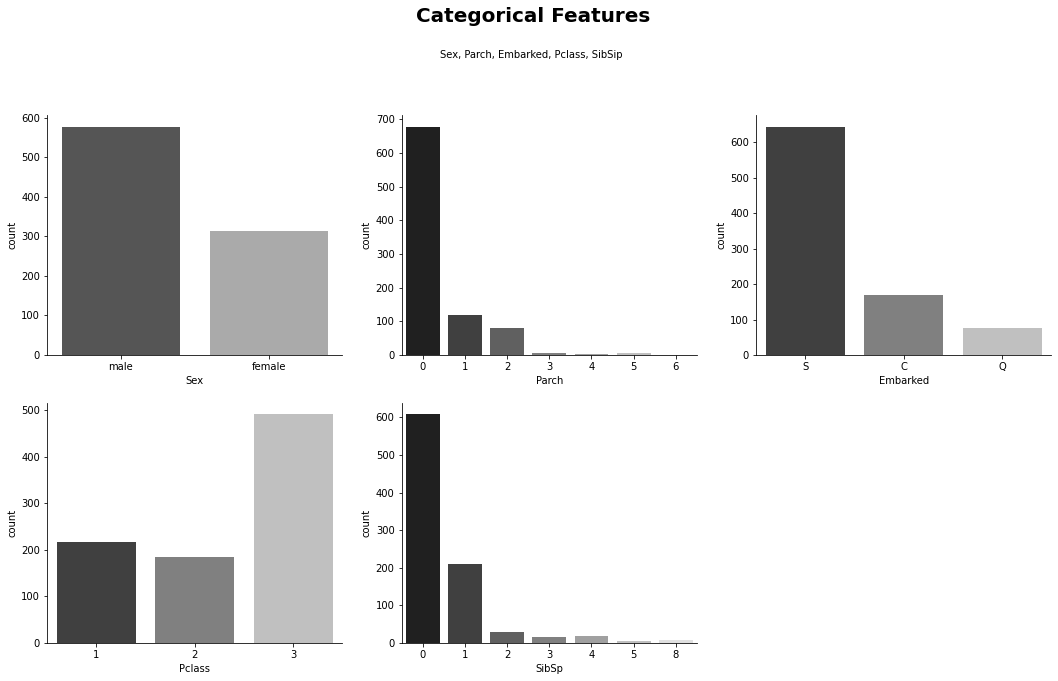

In [13]:
# Sex, Parch, Embarked, Pclass, SibSip 

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

ax_sex = ax0
sns.countplot(x='Sex', data=train, ax=ax_sex, palette='gist_gray')
sns.despine()

ax_parch = ax1
sns.countplot(x='Parch',data=train, ax=ax_parch, palette='gist_gray')
sns.despine()

ax_embarked = ax2
sns.countplot(x='Embarked', data=train, ax=ax_embarked, palette='gist_gray')
sns.despine()

ax_pclass = ax3
sns.countplot(x='Pclass', data=train, ax=ax_pclass, palette='gist_gray')
sns.despine()

ax_sibsip = ax4
sns.countplot(x='SibSp',data=train, ax=ax_sibsip, palette='gist_gray')
sns.despine()


# Title & Subtitle    
fig.suptitle('Categorical Features', fontweight='bold', fontsize=20)
fig.text(s='Sex, Parch, Embarked, Pclass, SibSip ' , x=0.5, y=0.94,  ha='center',va='top')


plt.show();

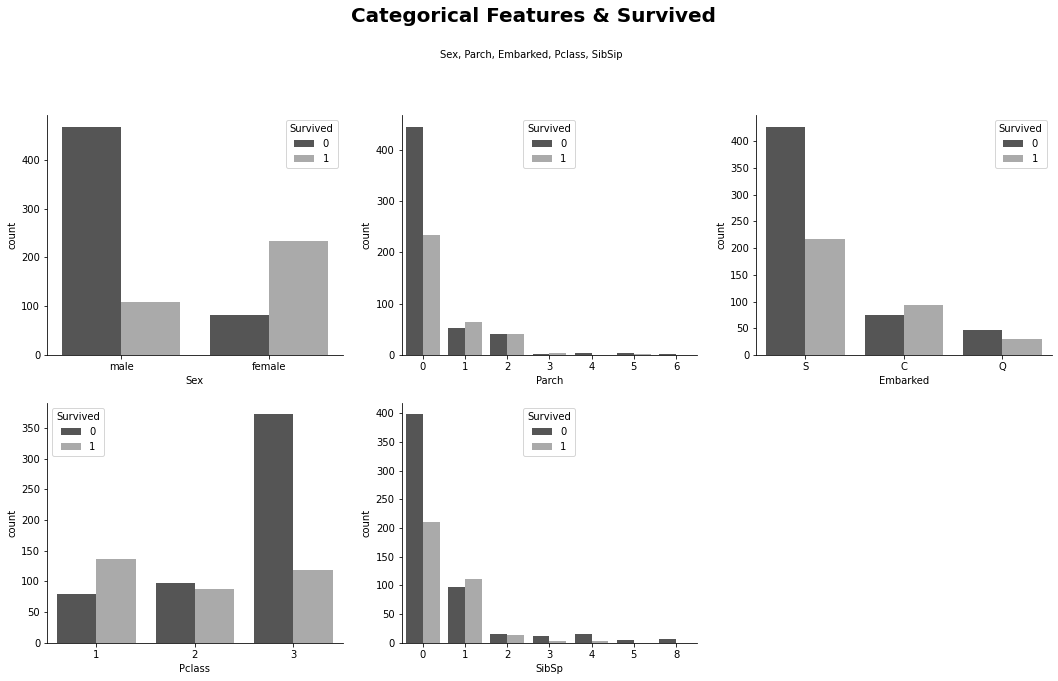

In [14]:
# Sex, Parch, Embarked, Pclass, SibSip 

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

ax_sex = ax0
sns.countplot(x='Sex',hue='Survived', data=train, ax=ax_sex, palette='gist_gray')
sns.despine()

ax_parch = ax1
sns.countplot(x='Parch',hue='Survived', data=train, ax=ax_parch, palette='gist_gray')
sns.despine()

ax_embarked = ax2
sns.countplot(x='Embarked', hue='Survived', data=train, ax=ax_embarked, palette='gist_gray')
sns.despine()

ax_pclass = ax3
sns.countplot(x='Pclass',hue='Survived', data=train, ax=ax_pclass, palette='gist_gray')
sns.despine()

ax_sibsip = ax4
sns.countplot(x='SibSp',hue='Survived', data=train, ax=ax_sibsip, palette='gist_gray')
sns.despine()


# Title & Subtitle    
fig.suptitle('Categorical Features & Survived', fontweight='bold', fontsize=20)
fig.text(s='Sex, Parch, Embarked, Pclass, SibSip ' , x=0.5, y=0.94,  ha='center',va='top')


plt.show();

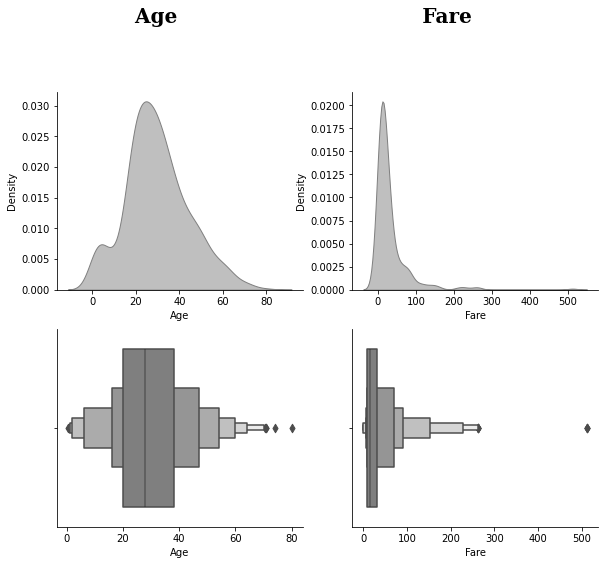

In [15]:
# age, fare 

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


ax_sex = ax0
sns.kdeplot(x='Age',color='gray', shade=True, alpha=.5, data=train,ax=ax_sex, palette='gist_gray')
sns.despine()

ax_sex2 = ax2
sns.boxenplot(x='Age',hue='Survived', data=train,   ax=ax_sex2, palette='gist_gray_r')
sns.despine()

ax_sex = ax1
sns.kdeplot(x='Fare',color='gray', shade=True, alpha=.5, data=train,ax=ax_sex, palette='gist_gray')
sns.despine()

ax_fare2 = ax3
sns.boxenplot(x='Fare',hue='Survived', data=train,   ax=ax_fare2, palette='gist_gray_r')
sns.despine()

# Title & Subtitle    
fig.text(0.1, 1, '               Age                                   Fare', fontsize=20, fontweight='bold', fontfamily='serif', ha='left') 

plt.show();

We can check out that there is some outliers in the continous features.

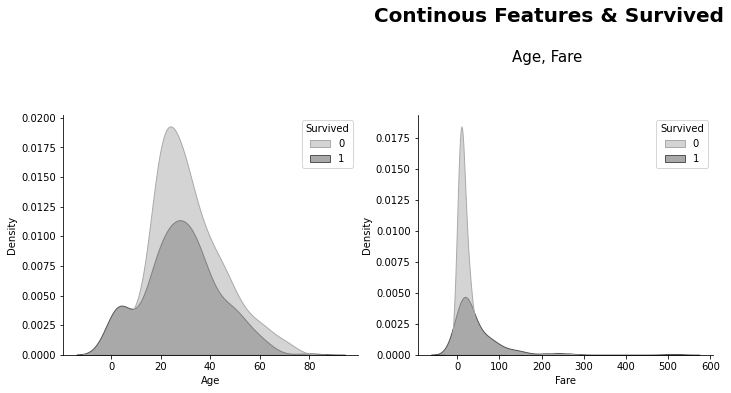

In [16]:
# Sex, Parch, Embarked, Pclass, SibSip 

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


ax_sex = ax0
sns.kdeplot(x='Age',hue='Survived', data=train,fill=True, alpha=.5,shade=True, ax=ax_sex, palette='gist_gray_r')
sns.despine()

ax_parch = ax1
sns.kdeplot(x='Fare',hue='Survived', data=train, fill=True, alpha=.5,shade=True, ax=ax_parch, palette='gist_gray_r')
sns.despine()

# Title & Subtitle    
fig.suptitle('Continous Features & Survived', fontweight='bold', fontsize=20)
fig.text(s='Age, Fare ' , x=0.5, y=0.94,  ha='center',va='top',fontsize=15)


plt.show();

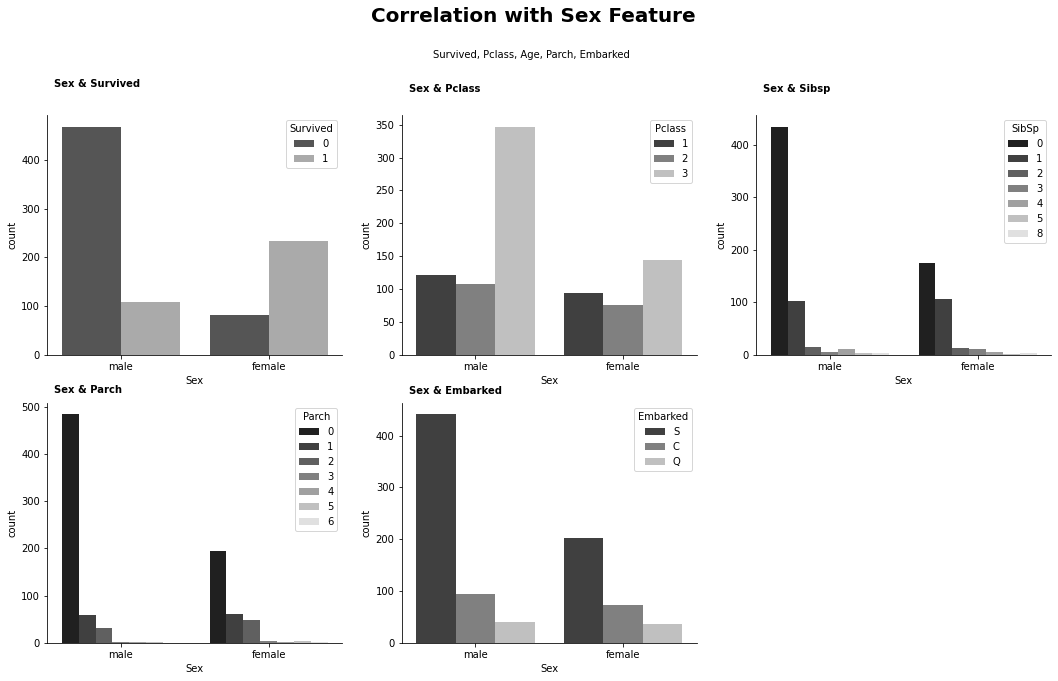

In [17]:
# Sex, Parch, Embarked, Pclass, SibSip 

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])


ax_sex = ax0
ax_sex.text(-0.45, 550,'Sex & Survived',fontweight='bold', fontsize=10)
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax_sex, palette='gist_gray')
sns.despine()

ax_parch = ax1
ax_parch.text(-0.45, 400,'Sex & Pclass',fontweight='bold', fontsize=10)
sns.countplot(x='Sex',hue='Pclass', data=train, ax=ax_parch, palette='gist_gray')
sns.despine()

ax_sibsp = ax2
ax_parch.text(1.95, 400,'Sex & Sibsp',fontweight='bold', fontsize=10)
sns.countplot(x='Sex', hue='SibSp', data=train, ax=ax_sibsp, palette='gist_gray')
sns.despine()


ax_pclass = ax3
ax_pclass.text(-0.45, 530,'Sex & Parch',fontweight='bold', fontsize=10)
sns.countplot(x='Sex', hue='Parch', data=train, ax=ax_pclass, palette='gist_gray')
sns.despine()

ax_embarked = ax4
ax_embarked.text(-0.45, 480,'Sex & Embarked',fontweight='bold', fontsize=10)
sns.countplot(x='Sex', hue='Embarked', data=train, ax=ax_embarked, palette='gist_gray')
sns.despine()





# Title & Subtitle    
fig.suptitle('Correlation with Sex Feature', fontweight='bold', fontsize=20)
fig.text(s='Survived, Pclass, Age, Parch, Embarked ' , x=0.5, y=0.94,  ha='center',va='top')


plt.show();

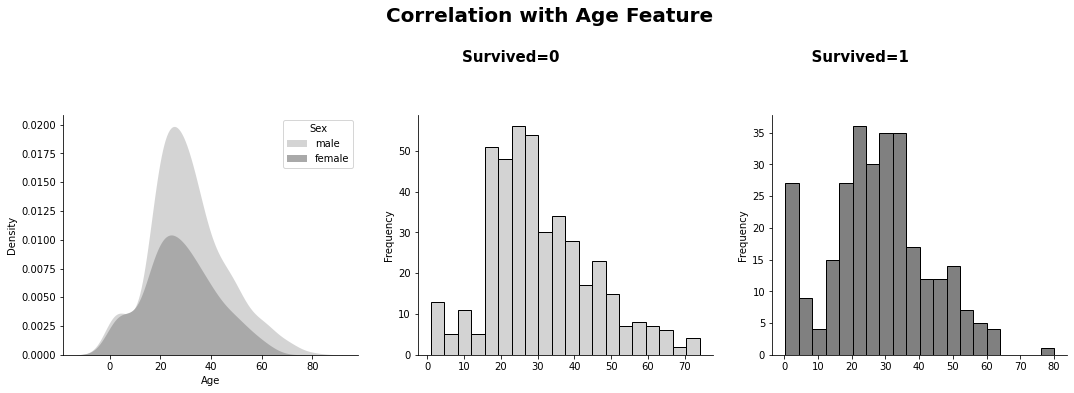

In [18]:
# Sex, Parch, Embarked, Pclass, SibSip 

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])


ax_sex = ax0
sns.kdeplot(x='Age', hue='Sex', data=train, ax=ax_sex, palette='gist_gray_r', fill=True, alpha=.5, linewidth=0, shade=True)
sns.despine()


train.loc[train['Survived'] ==0]['Age'].plot.hist(ax=ax1, bins=20, edgecolor='black', color='lightgray')
ax1 = list(range(0, 80, 5))


train.loc[train['Survived'] ==1]['Age'].plot.hist(ax=ax2, bins=20, edgecolor='black', color='gray')
ax2 = list(range(0, 80, 5))


# Title & Subtitle    
fig.suptitle('Correlation with Age Feature', fontweight='bold', fontsize=20)
fig.text(s='                                                    Survived=0                                                Survived=1' , fontweight='bold',fontsize=15, x=0.5, y=0.94,  ha='center',va='top')
   

plt.show();

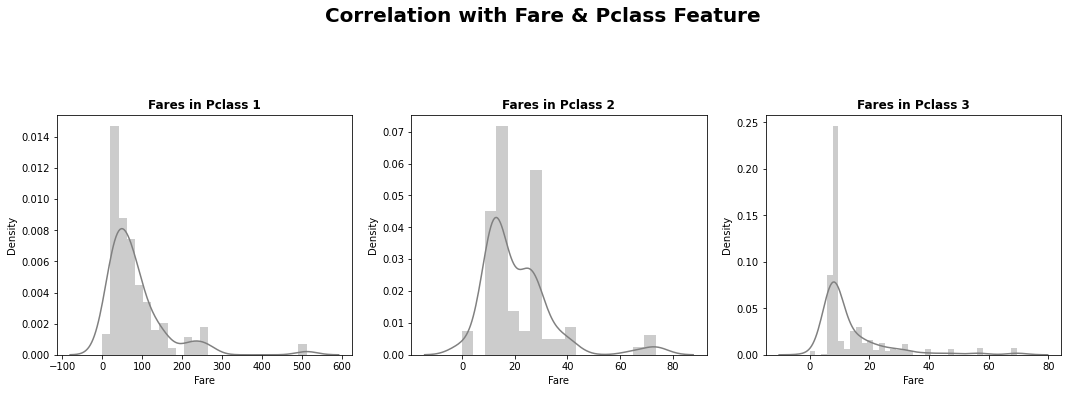

In [19]:
# Sex, Parch, Embarked, Pclass, SibSip 

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])


ax_sex = ax0
sns.distplot(train[train['Pclass']==1].Fare,ax=ax_sex, color='gray')
ax_sex.set_title('Fares in Pclass 1',fontweight='bold')

ax_sex2 = ax1
sns.distplot(train[train['Pclass']==2].Fare,ax=ax_sex2, color='gray')
ax_sex2.set_title('Fares in Pclass 2',fontweight='bold')

ax_sex3 = ax2
sns.distplot(train[train['Pclass']==3].Fare,ax=ax_sex3, color='gray')
ax_sex3.set_title('Fares in Pclass 3',fontweight='bold')



# Title & Subtitle    
fig.suptitle('Correlation with Fare & Pclass Feature', fontweight='bold', fontsize=20)
   

plt.show();

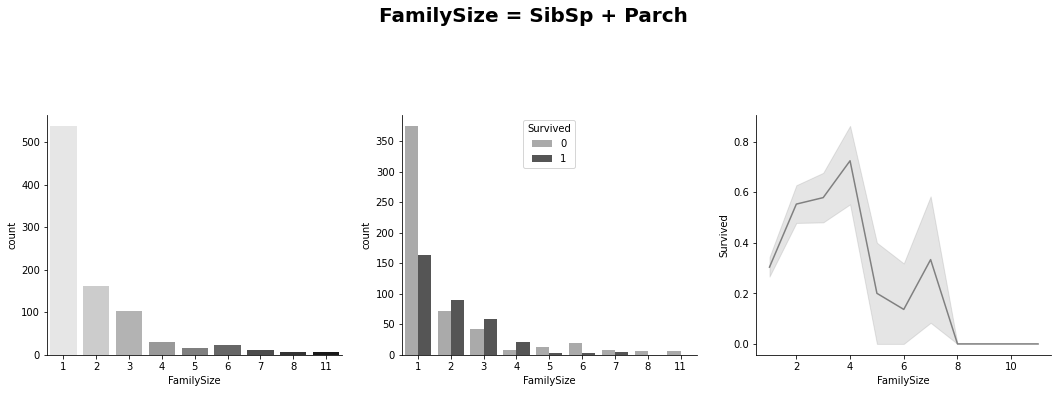

In [20]:
# Create a new features with Sibsp & Parch 
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Sex, Parch, Embarked, Pclass, SibSip 

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)



ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])


sns.countplot(x='FamilySize', data=train,  ax=ax0, palette='gist_gray_r')
sns.despine()

sns.countplot(x='FamilySize',hue='Survived', data=train, ax=ax1, palette='gist_gray_r')
sns.despine()

sns.lineplot(x='FamilySize',y='Survived', data=train, ax=ax2, color='gray')
sns.despine()

# Title & Subtitle    
fig.suptitle('FamilySize = SibSp + Parch', fontweight='bold', fontsize=20)


plt.show();

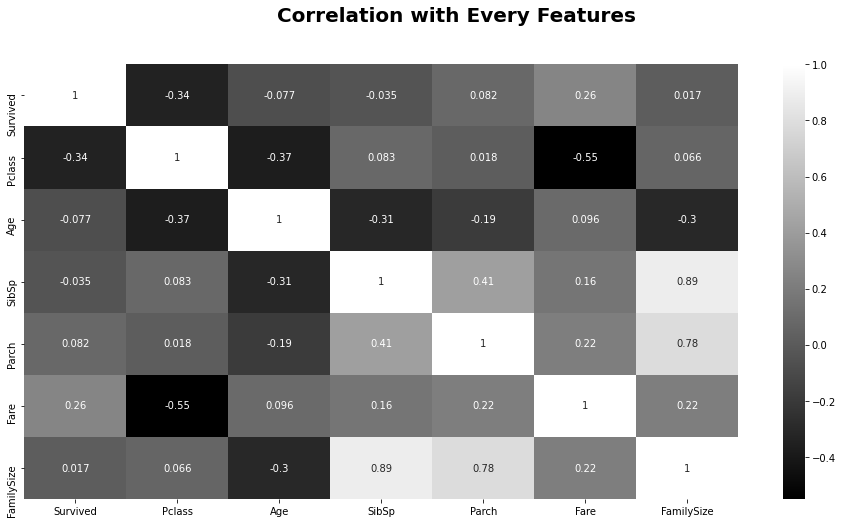

In [21]:
fig = plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True, cmap='gray')
fig.suptitle('Correlation with Every Features', fontweight='bold', fontsize=20)

plt.show()

In [22]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2


## **Conclusion of EDA**:
**Pclass** : the 1st class passengers have lot more chance to survive. 3rd class passengers survival rate seems very low .

**Sex** : Male rate seems higher than women, but the survival rate of women is much more higher than male in every Pclass and age. 

**Age** : We can check out that children have higher chance to survive. 

**Embarked** : The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.

# **Part2: Feature Engineering and Data Cleaning:**


## 1) **Data Cleaning**

First I am going to fill out the missing values. 

In [23]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
dtype: int64

Fill out the Embarked missing values with 'S'. Because the maximum passengers boarded from port S 

In [24]:
# filling Embarked missing values
train['Embarked'].fillna('S', inplace=True)
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
FamilySize      0
dtype: int64

Age distribution seems to be the same in Male and Female population

In [25]:
## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(train["Age"][train["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = train["Age"].median()
    age_pred = train["Age"][((train['SibSp'] == train.iloc[i]["SibSp"]) & 
                             (train['Parch'] == train.iloc[i]["Parch"]) & 
                             (train['Pclass'] == train.iloc[i]["Pclass"]))].median()
    
    if not np.isnan(age_pred) :
        train['Age'].iloc[i] = age_pred
        
    else :
        train['Age'].iloc[i] = age_med

In [26]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

## 2) **Feature Engineering**

In [27]:
train.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
dtype: object

## Categorical & Continuous Features

- Categorical Features - **One-hot-encoding**

- Continuous Features - **StandardScaler**


In [28]:
con_columns = [c for c,t in zip(train.dtypes.index, train.dtypes) if t == 'float64']
cat_columns = [c for c,t in zip(train.dtypes.index, train.dtypes) if t == 'object']

print('Continous columns:', con_columns)
print('Categorical columns:', cat_columns)

# Pclass, SibSp, Parch  left !

Continous columns: ['Age', 'Fare']
Categorical columns: ['Sex', 'Embarked']


### 1) [Age, Fare] 
### - Continuous Features: StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[con_columns] = scaler.fit_transform(train[con_columns])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,-0.545734,1,0,-0.502445,S,2
1,1,1,female,0.655962,1,0,0.786845,C,2
2,1,3,female,-0.245310,0,0,-0.488854,S,1
3,1,1,female,0.430644,1,0,0.420730,S,2
4,0,3,male,0.430644,0,0,-0.486337,S,1


### 2) [Sex, Embarked] 
### - Categorical Features : Onehot Encdoing

In [30]:
from sklearn.preprocessing import OneHotEncoder 

ohe = OneHotEncoder(sparse=False)
ohe.fit(train[cat_columns])

#check out encdoing
ohe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [31]:
# put the new columns to our data 

ohe_columns = list()
for lst in ohe.categories_:
    ohe_columns += lst.tolist()
    
new_train = pd.DataFrame(ohe.transform(train[cat_columns]), columns=ohe_columns)

In [32]:
new_train.head()

,female,male,C,Q,S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [33]:
# concat scaling and encoding features 
train = pd.concat([train, new_train], axis=1)

# remove previous categorical features
train = train.drop(columns=cat_columns)

# check 
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,female,male,C,Q,S
0,0,3,-0.545734,1,0,-0.502445,2,0.0,1.0,0.0,0.0,1.0
1,1,1,0.655962,1,0,0.786845,2,1.0,0.0,1.0,0.0,0.0
2,1,3,-0.245310,0,0,-0.488854,1,1.0,0.0,0.0,0.0,1.0
3,1,1,0.430644,1,0,0.420730,2,1.0,0.0,0.0,0.0,1.0
4,0,3,0.430644,0,0,-0.486337,1,0.0,1.0,0.0,0.0,1.0


### 3) [Pclass]

In [34]:
# use dummies for pclass 
pclass_columns = ['Pclass']
train = pd.get_dummies(data=train, columns=pclass_columns)
train.head()

,Survived,Age,SibSp,Parch,Fare,FamilySize,female,male,C,Q,S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.545734,1,0,-0.502445,2,0.0,1.0,0.0,0.0,1.0,0,0,1
1,1,0.655962,1,0,0.786845,2,1.0,0.0,1.0,0.0,0.0,1,0,0
2,1,-0.245310,0,0,-0.488854,1,1.0,0.0,0.0,0.0,1.0,0,0,1
3,1,0.430644,1,0,0.420730,2,1.0,0.0,0.0,0.0,1.0,1,0,0
4,0,0.430644,0,0,-0.486337,1,0.0,1.0,0.0,0.0,1.0,0,0,1


### 4) [Sibsp + Parch] -> Family Size 

In [35]:
# Create new features of Family Size 
train['single'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['small'] = train['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
train['median'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['large'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [36]:
train.head(2)

,Survived,Age,SibSp,Parch,Fare,FamilySize,female,male,C,Q,S,Pclass_1,Pclass_2,Pclass_3,single,small,median,large
0,0,-0.545734,1,0,-0.502445,2,0.0,1.0,0.0,0.0,1.0,0,0,1,0,1,0,0
1,1,0.655962,1,0,0.786845,2,1.0,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0


NOW! The feature engineering is clear! Next we are going to split the train-test set and go modeling ~!

# **Part3: Predictive Modeling**


## **1) Modeling**
#### 1) Logistic Regression

#### 2) Support Vector Machines(Linear and radial)

#### 3) Random Forest

#### 4) LightGBM

#### 5) KNeighborClassifier

#### 6) XGBoost

In [37]:
x = train.drop('Survived', axis=1).values
y = train['Survived'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=46,shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=46,shuffle=True)

In [38]:
# import Library 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [39]:
# 1. LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_valid)

print(f"Logistic Regression F1 Score: {f1_score(y_valid, y_pred, average='micro')}")

Logistic Regression F1 Score: 0.848314606741573


In [40]:
# 2. Support Vector Machine

svc = SVC(probability=True)

svc.fit(x_train, y_train)

y_pred = svc.predict(x_valid)

print(f"Support Vector Machine F1 Score: {f1_score(y_valid, y_pred, average='micro')}")

Support Vector Machine F1 Score: 0.8764044943820225


In [41]:
# 3. Rnadom Forest

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_valid)

print(f"RandomForest F1 Score: {f1_score(y_valid, y_pred, average='micro')}")

RandomForest F1 Score: 0.8202247191011236


In [42]:
# 4. XGBoost

xgb = XGBClassifier()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_valid)

print(f"XGBoost F1 Score: {f1_score(y_valid, y_pred, average='micro')}")

[00:44:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost F1 Score: 0.8258426966292135


In [43]:
# 5. LightGBM

lgb = LGBMClassifier()

lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_valid)

print(f"LightGBM F1 Score: {f1_score(y_valid, y_pred, average='micro')}")

LightGBM F1 Score: 0.8370786516853933


In [44]:
# 6. KNeighborsClassifier 

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_valid)

print(f"KNeighborsClassifier F1 Score: {f1_score(y_valid, y_pred, average='micro')}")

KNeighborsClassifier F1 Score: 0.8033707865168539


## **2) Cross Validation**

In [45]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=2020, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression',
             'SVC',
             'Random Forest',
             'XGB',
             'LGBM',
             'KNeighbors']

models=[LogisticRegression(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier(),
        KNeighborsClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

[00:44:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,CV Mean,Std
Logistic Regression,0.813670,0.052816
SVC,0.822597,0.047524
Random Forest,0.810275,0.055734
XGB,0.820400,0.060783
LGBM,0.830462,0.064158
KNeighbors,0.792335,0.044296


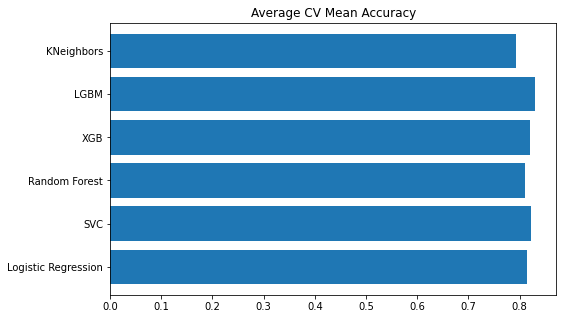

In [46]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## **3) Ensembling**

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, # 200개라는 것은 200개를 붙여서 이제 실행을 해준다는 것을 말해주는 것이다 
                       random_state=0,
                       learning_rate=0.1)
result=cross_val_score(ada,x,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8103495630461923


### Thanks a lot for having a look at this notebook. If you found this notebook useful, Please give me a **Upvote**.